In [1]:
from sklearn.datasets import load_iris
import pandas as pd

In [17]:
iris = load_iris()
x = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
print(feature_names)
print(target_names)
print(x[:10],y)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
from sklearn.model_selection import train_test_split


In [4]:
x_train,x_test,y_train,y_test = train_test_split(x,y , test_size = 0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


- Train Data

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
classifier_knn = KNeighborsClassifier(n_neighbors = 3)
classifier_knn.fit(x_train,y_train)
y_pred = classifier_knn.predict(x_test)

In [6]:
print('Accuracy :',metrics.accuracy_score(y_test,y_pred))

Accuracy : 0.9777777777777777


In [7]:
sample = [[3,2,5,6],[4,1,1,2],[4,3,2,4],[4,1,1,4]]
preds = classifier_knn.predict(sample)
pred_species = [iris.target_names[p] for p in preds]
print(pred_species)

['virginica', 'setosa', 'versicolor', 'versicolor']


# Binarization

In [8]:
import numpy as np
from sklearn import preprocessing
input_data = [[2.1,-1.9,5.5],[-1.0,0,4],[3,-3,-4]]
binarized_data = preprocessing.Binarizer(threshold = 0.8).transform(input_data)
binarized_data

array([[1., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

# mean removal

In [9]:
import numpy as np
from sklearn import preprocessing
input_data = np.array([[2.1,-1.9,5.5],[-1.0,0,4],[3,-3,-4]])
print('mean : ',input_data.mean(axis=0))
print('std deviation :',input_data.std(axis = 0))

#mean removal
data_scaled = preprocessing.scale(input_data)
print(data_scaled.mean(axis=0))

mean :  [ 1.36666667 -1.63333333  1.83333333]
std deviation : [1.7133463  1.23917535 4.16999867]
[2.22044605e-16 1.48029737e-16 0.00000000e+00]


# scaling

In [10]:
import numpy as np
from sklearn import preprocessing
input_data = np.array([[2.1,-1.9,5.5],[-1.0,0,4],[3,-3,-4]])
data_scaler = preprocessing.MinMaxScaler(feature_range = (0,5))
data_scaled = data_scaler.fit_transform(input_data)
data_scaled

array([[3.875     , 1.83333333, 5.        ],
       [0.        , 5.        , 4.21052632],
       [5.        , 0.        , 0.        ]])

# normalization l1

In [11]:
import numpy as np
from sklearn import preprocessing
input_data = np.array([[2.1,-1.9,5.5],[-1.0,0,4],[3,-3,-4]])
normalized_l1 = preprocessing.normalize(input_data, norm='l1')
normalized_l1

array([[ 0.22105263, -0.2       ,  0.57894737],
       [-0.2       ,  0.        ,  0.8       ],
       [ 0.3       , -0.3       , -0.4       ]])

# normalized l2

In [12]:
import numpy as np
from sklearn import preprocessing
input_data = np.array([[2.1,-1.9,5.5],[-1.0,0,4],[3,-3,-4]])
normalized_l2 = preprocessing.normalize(input_data,norm='l2')
normalized_l2

array([[ 0.33946114, -0.30713151,  0.88906489],
       [-0.24253563,  0.        ,  0.9701425 ],
       [ 0.51449576, -0.51449576, -0.68599434]])

# missing values

In [13]:
import pandas as pd
import numpy as np
df = pd.DataFrame([['x','y'],[np.nan,'x'],['y',np.nan]])
df

,0,1
0,x,y
1,NaN,x
2,y,NaN


In [14]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')
print(imp.fit_transform(df))

[['x' 'y']
 ['x' 'x']
 ['y' 'x']]


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
iris = pd.read_csv('IRIS.csv')
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [2]:
iris.shape

(150, 5)

In [3]:
iris['species'].value_counts()


species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

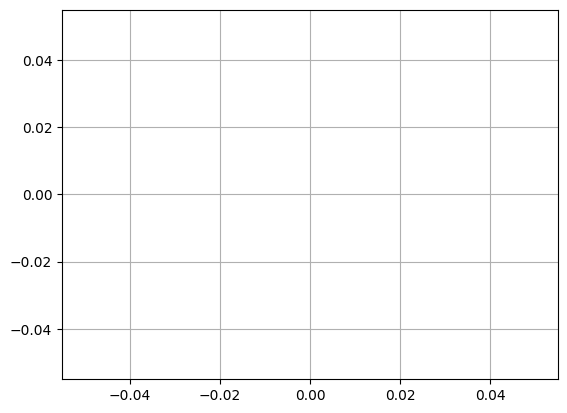

In [4]:
iris_setso = iris.loc[iris['species']=='setosa'];
iris_virginica = iris.loc[iris['species']=='virginica'];
iris_versicolor = iris.loc[iris['species']=='versicolor'];
plt.plot(iris_setso['petal_length'],np.zeros_like(iris_setso['petal_length']),'o')
plt.plot(iris_versicolor['petal_length'],np.zeros_like(iris_versicolor['petal_length']),'o')
plt.plot(iris_virginica['petal_length'],np.zeros_like(iris_virginica['petal_length']),'o')

plt.grid()
plt.show()

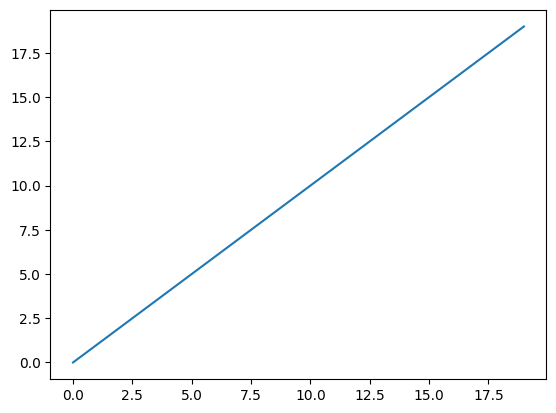

In [5]:
import matplotlib.pyplot as plt
plt.plot(range(20), range(20))
plt.show()

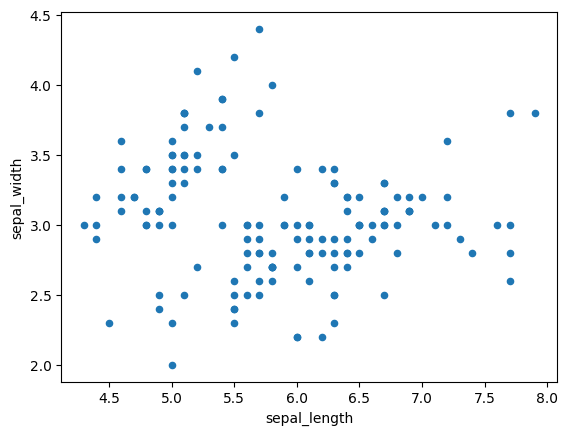

In [6]:
iris.plot(kind='scatter',x='sepal_length',y='sepal_width')
plt.show()

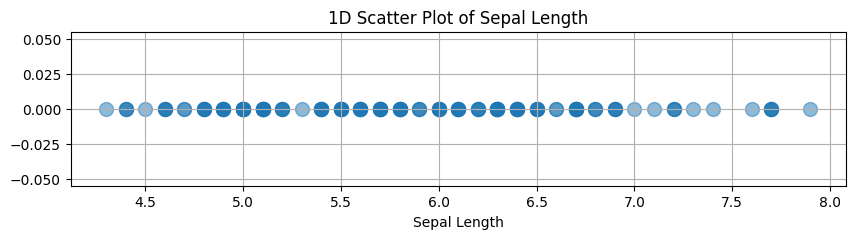

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the iris dataset
iris = sns.load_dataset("iris")

# Plotting a 1D scatter plot for sepal_length
plt.figure(figsize=(10, 2))
plt.scatter(iris['sepal_length'], [0]*len(iris), alpha=0.5, s=100)
plt.xlabel('Sepal Length')
plt.title('1D Scatter Plot of Sepal Length')
plt.grid()
plt.show()
